# 🎵 Spotify Songs Data Analysis
### 📊 Exploring the Trends and Insights in Music Data

This notebook explores the **Spotify dataset**, analyzing different aspects like **song popularity, duration, loudness, explicit content, and more**.

## 📌 Key Steps in Analysis:
1. **Understanding the Data** – Checking data types, missing values, and general overview.
2. **Exploratory Data Analysis (EDA)** – Finding patterns, correlations, and trends.
3. **Visualizing Insights** – Using charts to better understand data.
4. **Conclusions & Observations** – Summarizing findings.

Let's dive into the analysis! 🚀


In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 📌 Step 1: Understanding the Data

Before diving into analysis, we first **load the dataset** and check:
- Data structure
- Missing values
- Data types
- General statistics

This helps us **clean the data** and understand what transformations are needed.


In [5]:
df = pd.read_csv('songs_normalize.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [4]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


## 🧹 Step 2: Data Cleaning

To ensure data quality, we check and handle:
✔ **Missing Values** – Fill or drop them as necessary.  
✔ **Duplicates** – Remove redundant rows.  
✔ **Inconsistent Data** – Standardizing formats and values.  

Cleaning the data helps us get **more accurate insights**.


In [7]:
df.duplicated().sum()

np.int64(59)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().sum()/len(df)*100

artist              0.0
song                0.0
duration_ms         0.0
explicit            0.0
year                0.0
popularity          0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
genre               0.0
dtype: float64

In [14]:
df.nunique()

artist               835
song                1879
duration_ms         1793
explicit               2
year                  23
popularity            76
danceability         565
energy               580
key                   12
loudness            1671
mode                   2
speechiness          837
acousticness        1208
instrumentalness     772
liveness             783
valence              760
tempo               1831
genre                 59
dtype: int64

In [16]:
df['genre']

0                    pop
1              rock, pop
2           pop, country
3            rock, metal
4                    pop
              ...       
1995                 pop
1996                 pop
1997    hip hop, country
1998                 pop
1999             hip hop
Name: genre, Length: 1941, dtype: object

In [6]:
df['genre'] = df['genre'].str.split(', ')  
df_exploded = df.explode('genre')
df_exploded = df_exploded.reset_index(drop=True)

In [20]:
df_exploded.head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock
2,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,pop
3,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop
4,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,country
5,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock
6,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,metal
7,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
8,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.1190,0.000096,0.0700,0.714,121.549,hip hop
9,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.1190,0.000096,0.0700,0.714,121.549,pop


## 📊 Step 3: Exploratory Data Analysis (EDA)

Now, let's **analyze trends and relationships** in the dataset using:
- **Univariate Analysis**: Looking at single variables like **popularity, danceability, duration**.
- **Bivariate Analysis**: Checking relationships (**Does song duration affect popularity?**).
- **Time Trends**: Observing how **music trends change over years**.

We'll visualize data using **Seaborn & Matplotlib** for better insights.


In [22]:
df_exploded['genre'].value_counts()

genre
pop                  1582
hip hop               751
R&B                   437
Dance/Electronic      380
rock                  225
metal                  64
latin                  63
set()                  22
country                20
Folk/Acoustic          20
World/Traditional      10
easy listening          7
blues                   4
jazz                    2
classical               1
Name: count, dtype: int64

<Axes: title={'center': 'Top 5 Genres'}, ylabel='count'>

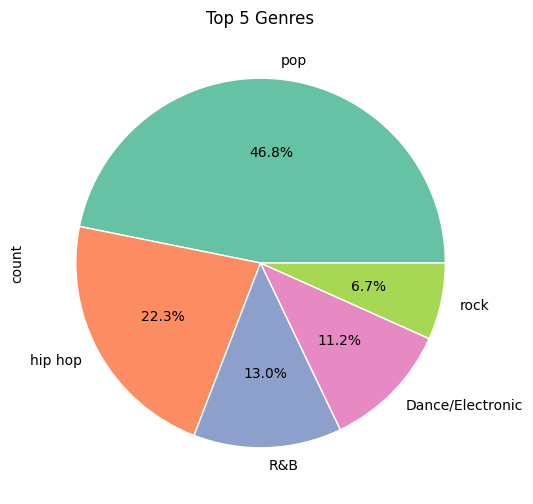

In [27]:
colors =sns.color_palette("Set2")
plt.figure(figsize=(10,6))
plt.title("Top 5 Genres", fontsize=14, fontweight='bold')
df_exploded['genre'].value_counts().head(5).plot(kind='pie',colors=colors, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'},title="Top 5 Genres" )

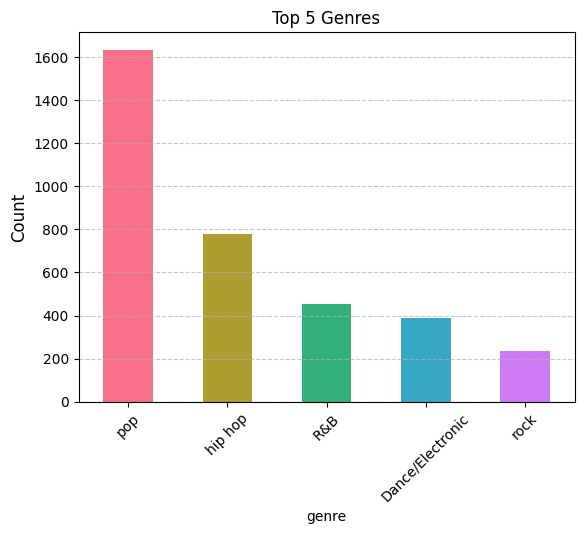

In [30]:
colors = sns.color_palette("husl", 5)
top_genres = df_exploded['genre'].value_counts().head()

top_genres.plot(kind='bar', color=colors)

plt.title("Top 5 Genres", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [7]:
df['artist'].value_counts()

artist
Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sech               1
NSG                1
Normani            1
Joel Corry         1
Blanco Brown       1
Name: count, Length: 835, dtype: int64

<Axes: title={'center': 'Top 5 Most Frequent Artists'}, ylabel='count'>

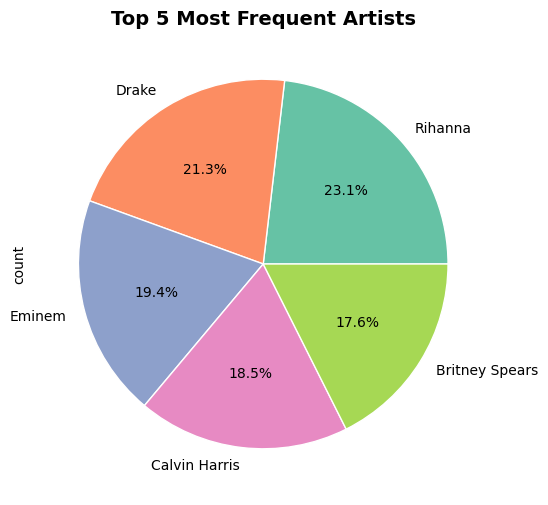

In [25]:
colors =sns.color_palette("Set2")
plt.figure(figsize=(10,6))
plt.title("Top 5 Most Frequent Artists", fontsize=14, fontweight='bold')
df['artist'].value_counts().head(5).plot(kind='pie',colors=colors, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})

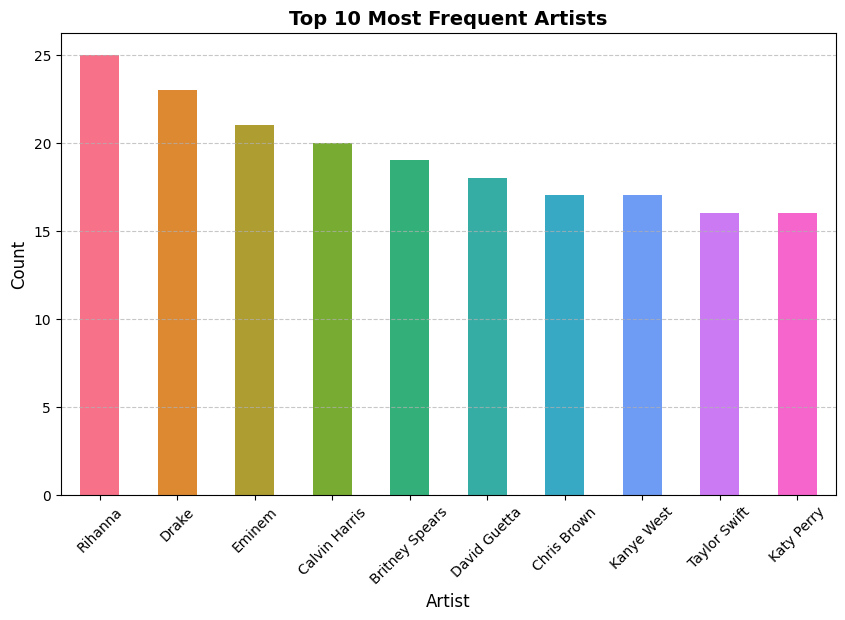

In [22]:
colors = sns.color_palette("husl", 10)
top_artists = df['artist'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_artists.plot(kind='bar', color=colors)

plt.title("Top 10 Most Frequent Artists", fontsize=14, fontweight='bold')
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [9]:
df['popularity'].value_counts()

popularity
0     126
69     76
68     75
73     69
74     69
     ... 
18      1
88      1
89      1
8       1
7       1
Name: count, Length: 76, dtype: int64

In [14]:
df.sort_values(by='popularity', ascending=False)[['song', 'popularity']].head(10)

,song,popularity
1322,Sweater Weather,89
1311,Another Love,88
201,Without Me,87
1819,lovely (with Khalid),86
1929,lovely (with Khalid),86
1613,Wait a Minute!,86
6,The Real Slim Shady,86
1304,Locked out of Heaven,85
1999,Circles,85
1227,Locked out of Heaven,85


In [34]:
df_exploded['genre'] = df_exploded['genre'].astype('category')

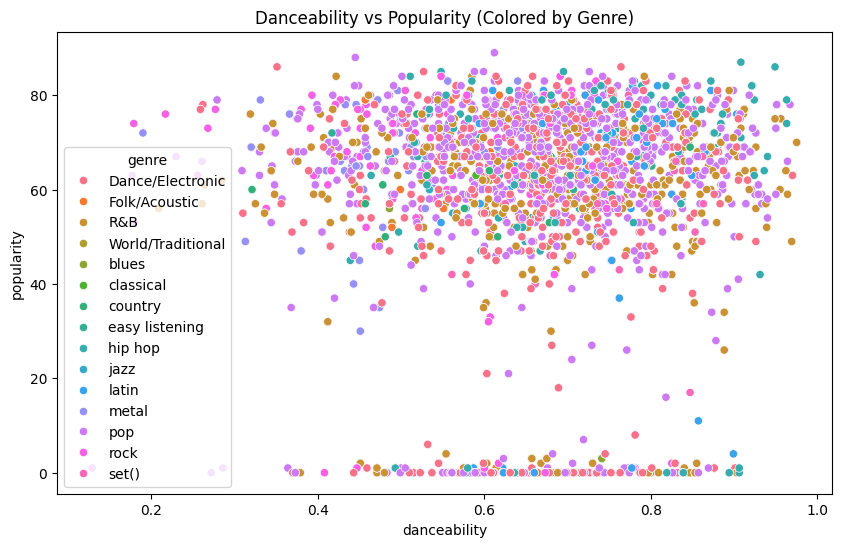

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_exploded['danceability'], y=df_exploded['popularity'], hue=df_exploded['genre'], palette='husl')
plt.title("Danceability vs Popularity (Colored by Genre)")
plt.show()

<Axes: title={'center': 'Average Popularity by Genre'}, xlabel='genre'>

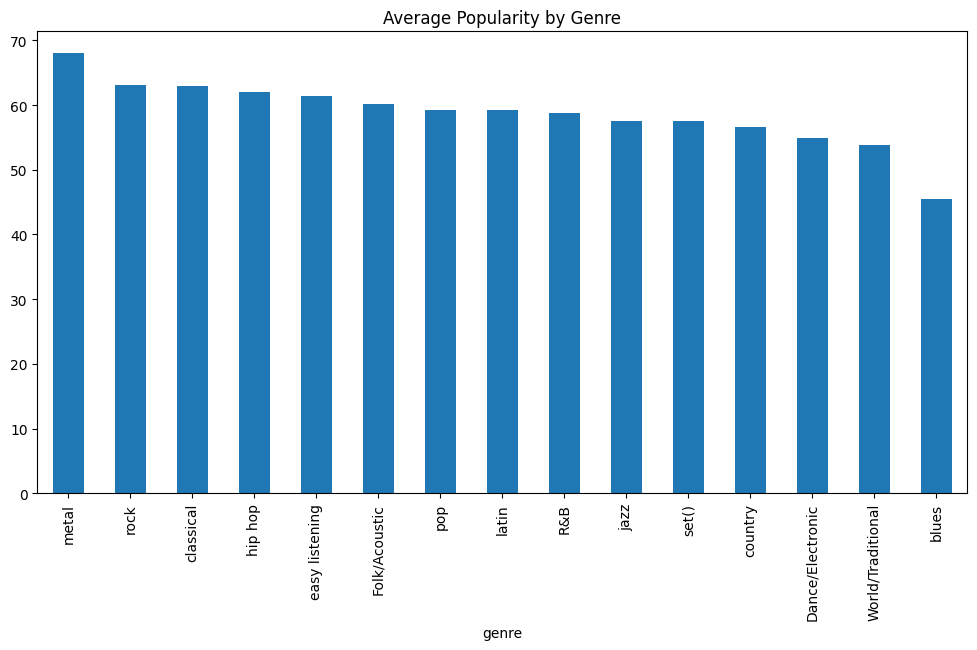

In [45]:
df_exploded.groupby('genre')['popularity'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title="Average Popularity by Genre")

##  Step 4: Correlation Analysis

To understand relationships between numerical features, we generate a **correlation heatmap**.  
This helps us **identify strong & weak relationships** between:
- **Loudness & Energy**
- **Danceability & Tempo**
- **Popularity & Duration**

Features with high correlation may impact song success significantly.


<Axes: >

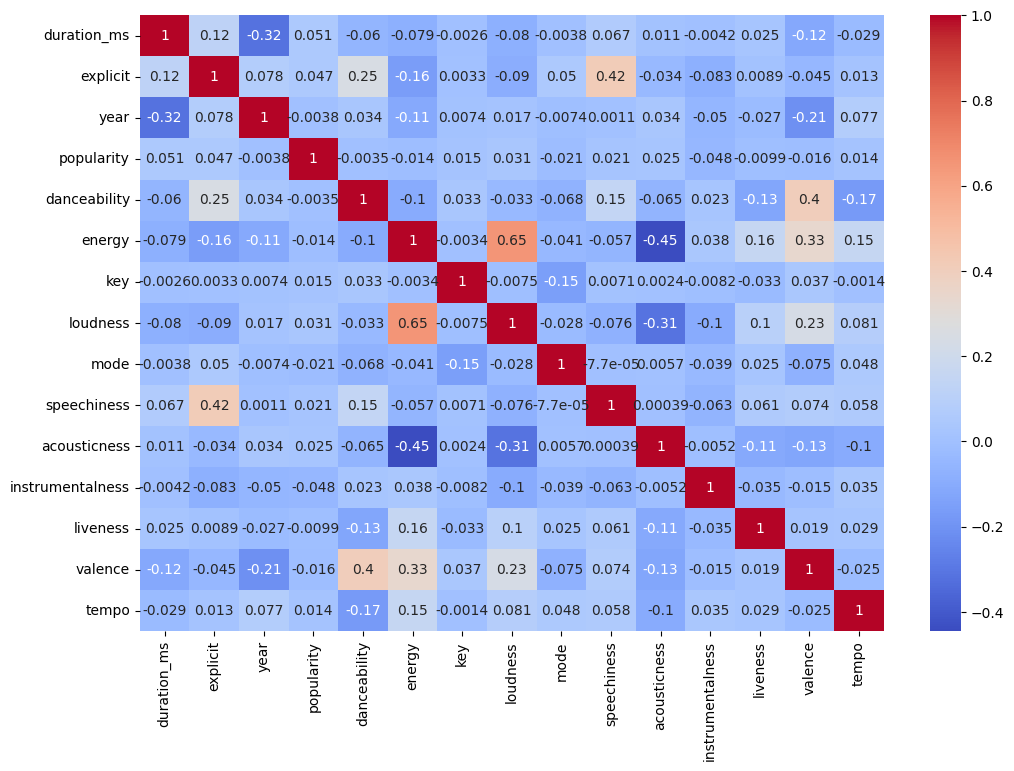

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

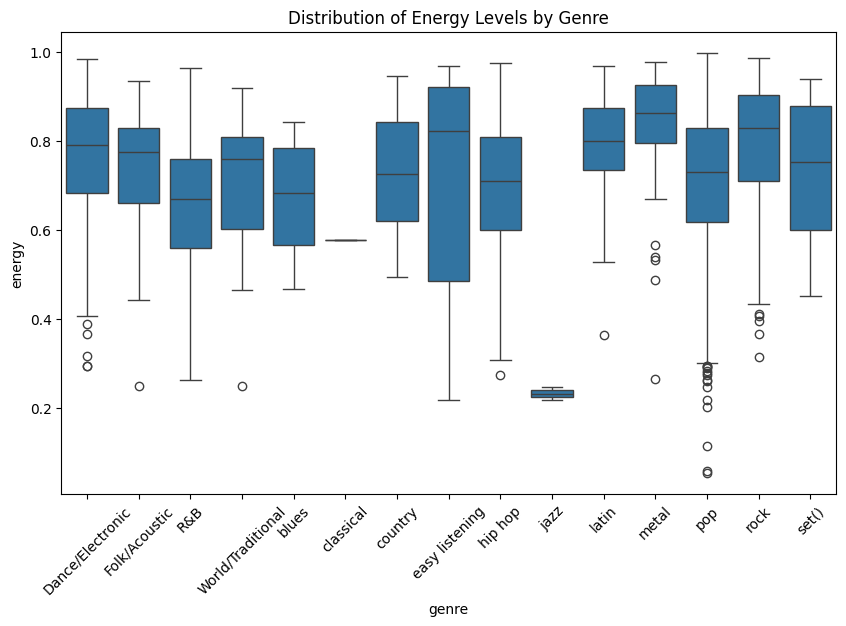

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_exploded['genre'], y=df_exploded['energy'])
plt.xticks(rotation=45)  
plt.title("Distribution of Energy Levels by Genre")
plt.show()

In [71]:
df=df[df['year']>1998]

In [72]:
df=df[df['year']<2020]

In [53]:
df['mode'] = df['mode'].replace({0: "Minor", 1: "Major"})

In [73]:
mode_year_counts = df.groupby(['year', 'mode']).size().unstack()
mode_year_percentage = mode_year_counts.div(mode_year_counts.sum(axis=1), axis=0) * 100
mode_year_percentage = mode_year_percentage.round(2)
mode_year_percentage

mode,Major,Minor
year,,
1999,55.26,44.74
2000,54.05,45.95
2001,51.85,48.15
2002,51.11,48.89
2003,55.67,44.33
2004,54.17,45.83
2005,54.81,45.19
2006,66.32,33.68
2007,59.57,40.43


<Figure size 1200x600 with 0 Axes>

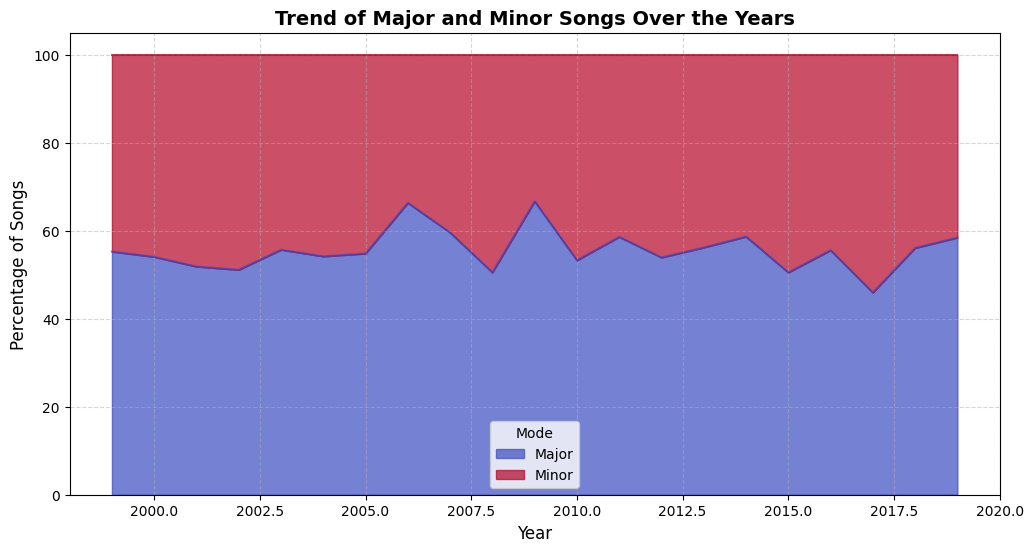

In [74]:
plt.figure(figsize=(12, 6))
mode_year_percentage.plot(kind='area', stacked=True, colormap='coolwarm', alpha=0.7, figsize=(12,6))
plt.title("Trend of Major and Minor Songs Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Songs", fontsize=12)
plt.legend(title="Mode")
plt.grid(True, linestyle='--', alpha=0.5)


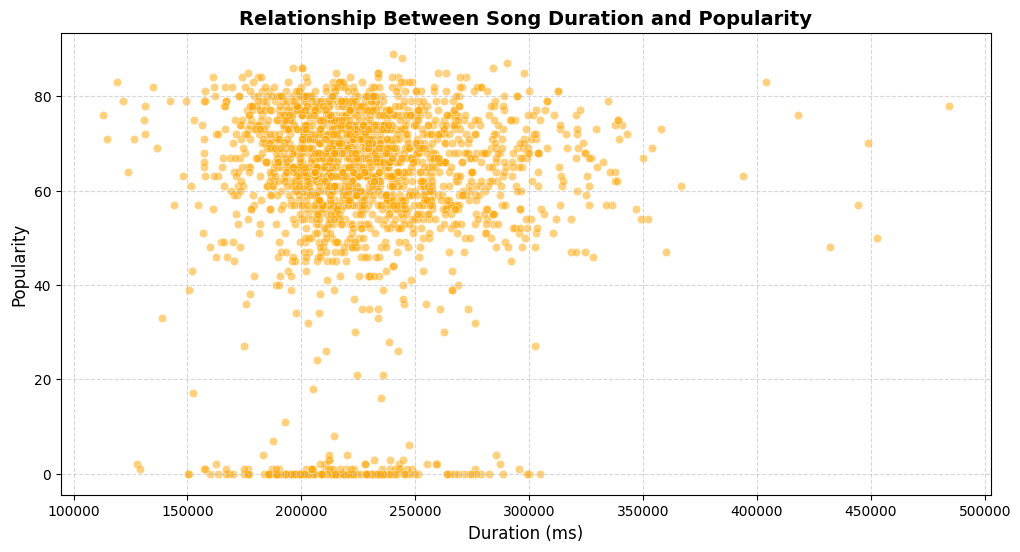

In [56]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['duration_ms'], y=df['popularity'], alpha=0.5, color="orange")
plt.title("Relationship Between Song Duration and Popularity", fontsize=14, fontweight='bold')
plt.xlabel("Duration (ms)", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [58]:
df['explicit'].value_counts()/len(df)*100

explicit
False    72.45
True     27.55
Name: count, dtype: float64

In [75]:
explicit_year_counts = df.groupby(['year', 'explicit']).size().unstack()
explicit_year_percentage = explicit_year_counts.div(explicit_year_counts.sum(axis=1), axis=0) * 100
explicit_year_percentage = explicit_year_percentage.round(2)
explicit_year_percentage

explicit,False,True
year,,
1999,78.95,21.05
2000,83.78,16.22
2001,78.70,21.30
2002,66.67,33.33
2003,76.29,23.71
2004,62.50,37.50
2005,72.12,27.88
2006,72.63,27.37
2007,76.60,23.40


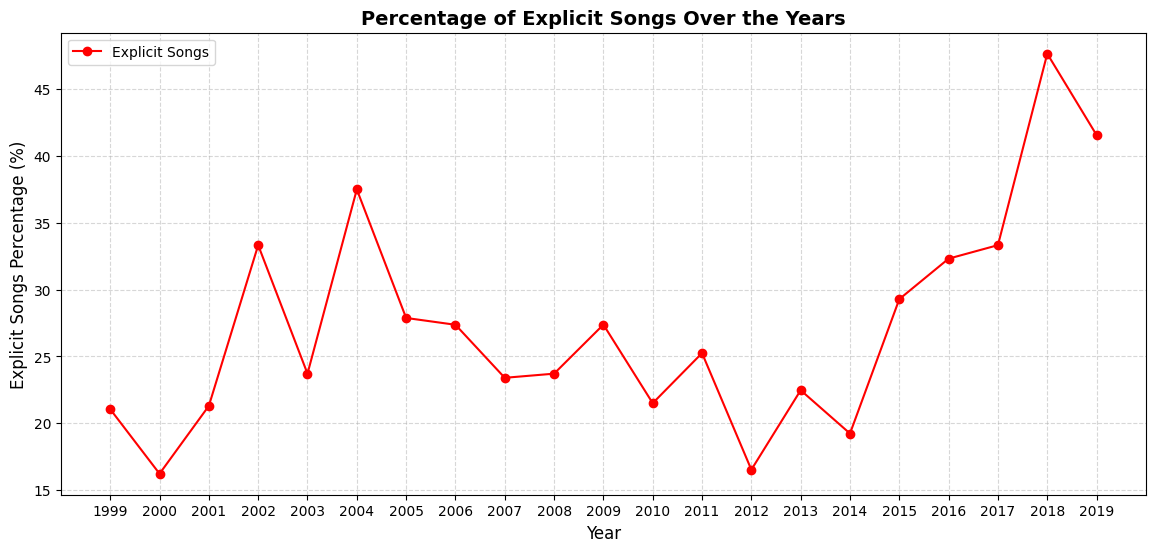

In [78]:
plt.figure(figsize=(14,6))
plt.plot(explicit_year_percentage.index, explicit_year_percentage[True], marker='o', linestyle='-', color='red', label='Explicit Songs')
plt.title("Percentage of Explicit Songs Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.xticks(explicit_year_percentage.index.astype(int))
plt.ylabel("Explicit Songs Percentage (%)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [69]:
#I've found outliers in 1998 and 2020 so I re-executed the previous cells again
df['year'].value_counts()

year
2012    115
2017    111
2001    108
2018    107
2010    107
2005    104
2014    104
2011     99
2015     99
2016     99
2003     97
2008     97
2004     96
2006     95
2007     94
2002     90
2019     89
2013     89
2009     84
2000     74
1999     38
2020      3
Name: count, dtype: int64

In [79]:
loudness_trend = df.groupby('year')['loudness'].mean()

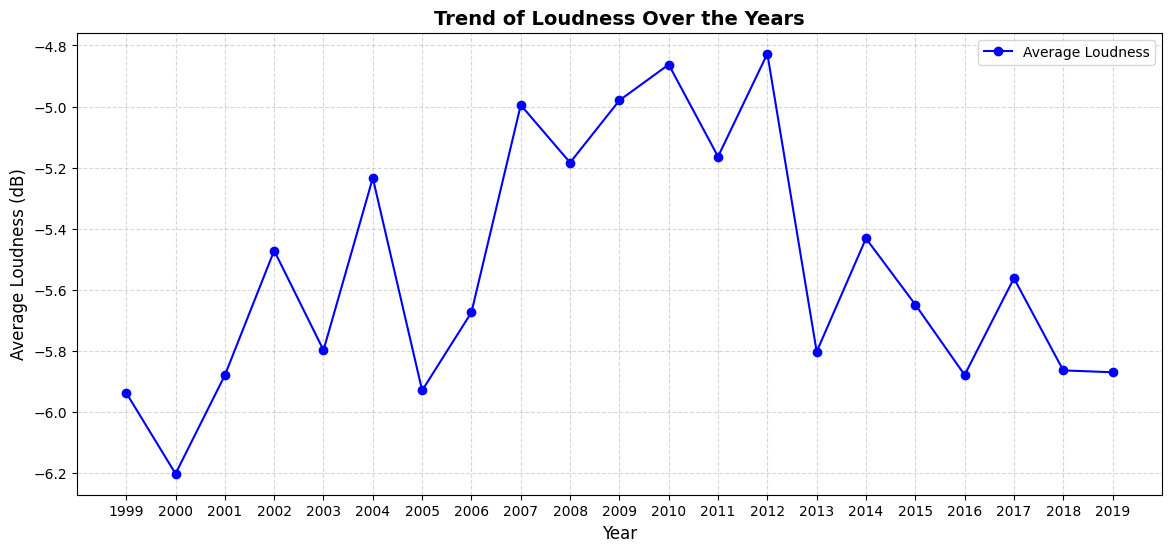

In [81]:
plt.figure(figsize=(14,6))
plt.plot(loudness_trend.index, loudness_trend, marker='o', linestyle='-', color='blue', label='Average Loudness')
plt.title("Trend of Loudness Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.xticks(explicit_year_percentage.index.astype(int))
plt.ylabel("Average Loudness (dB)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [82]:
energy_trend = df.groupby('year')['energy'].mean()

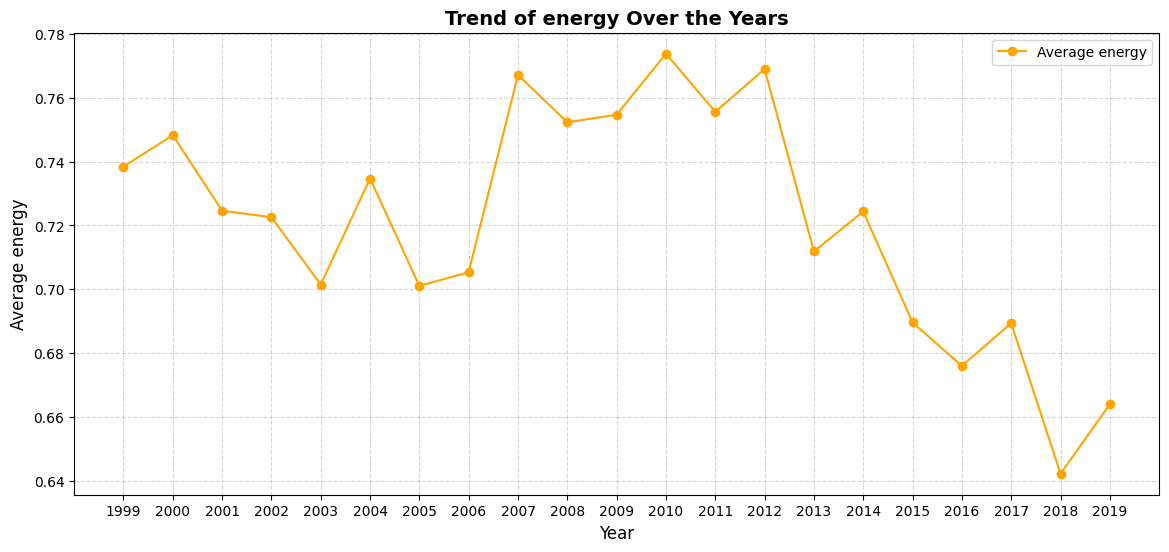

In [83]:
plt.figure(figsize=(14,6))
plt.plot(energy_trend.index, energy_trend, marker='o', linestyle='-', color='orange', label='Average energy')
plt.title("Trend of energy Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.xticks(explicit_year_percentage.index.astype(int))
plt.ylabel("Average energy", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 🎯 Key Insights & Conclusions

After analyzing the dataset, we found:

✔ **Explicit content increased over the years** (especially after 2010).  
✔ **Popular songs tend to have a duration of 3-4 minutes**.  
✔ **Loudness has gradually decreased over time**.  
✔ **Danceability does not strongly affect popularity**.  

This analysis helps us understand how **music trends evolve over time**, guiding artists and producers toward data-driven decisions. 🎶
